In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [3]:
# Import data into a numpy array
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

#Initialize a variable as the Guassian Naive Bayes classifier and fit it with the data
# can call partial_fit on super large parts of data--chunking
gaussianNB = GaussianNB()
gaussianNB.fit(X, Y)
GaussianNB()

GaussianNB()

In [4]:
gaussianNB.predict([[-0.8, -1]])

array([1])

In [5]:
# perfectly predicts stuff its seen a bunch of times already, go figure

gaussianNB.score(X, Y)

1.0

In [6]:
clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y)) # unique Y
GaussianNB()
print(clf_pf.predict([[-0.8, -1]]))

[1]


In [7]:
import sklearn.naive_bayes as nb
import numpy as np
import pandas as pd 

In [19]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', names=column_names)

In [20]:
data.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [21]:
column_names = ['col' + str(x) for x in range(0, len(data.columns))]
column_names[0:5]

['col0', 'col1', 'col2', 'col3', 'col4']

In [22]:
y = data['col57']
x = data.drop(['col57', 'col54', 'col55', 'col56'], axis=1)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: col57, dtype: int64

In [25]:
x.isnull().any()

col0     False
col1     False
col2     False
col3     False
col4     False
col5     False
col6     False
col7     False
col8     False
col9     False
col10    False
col11    False
col12    False
col13    False
col14    False
col15    False
col16    False
col17    False
col18    False
col19    False
col20    False
col21    False
col22    False
col23    False
col24    False
col25    False
col26    False
col27    False
col28    False
col29    False
col30    False
col31    False
col32    False
col33    False
col34    False
col35    False
col36    False
col37    False
col38    False
col39    False
col40    False
col41    False
col42    False
col43    False
col44    False
col45    False
col46    False
col47    False
col48    False
col49    False
col50    False
col51    False
col52    False
col53    False
dtype: bool

In [26]:
y.isnull().any()

False

In [28]:
for column in x.columns:
    if x[column].max()> 100:
        print x[column].max()

In [29]:
for column in x.columns:
    x[column] = x[column] * 0.01

In [30]:
import seaborn as sns
%matplotlib inline

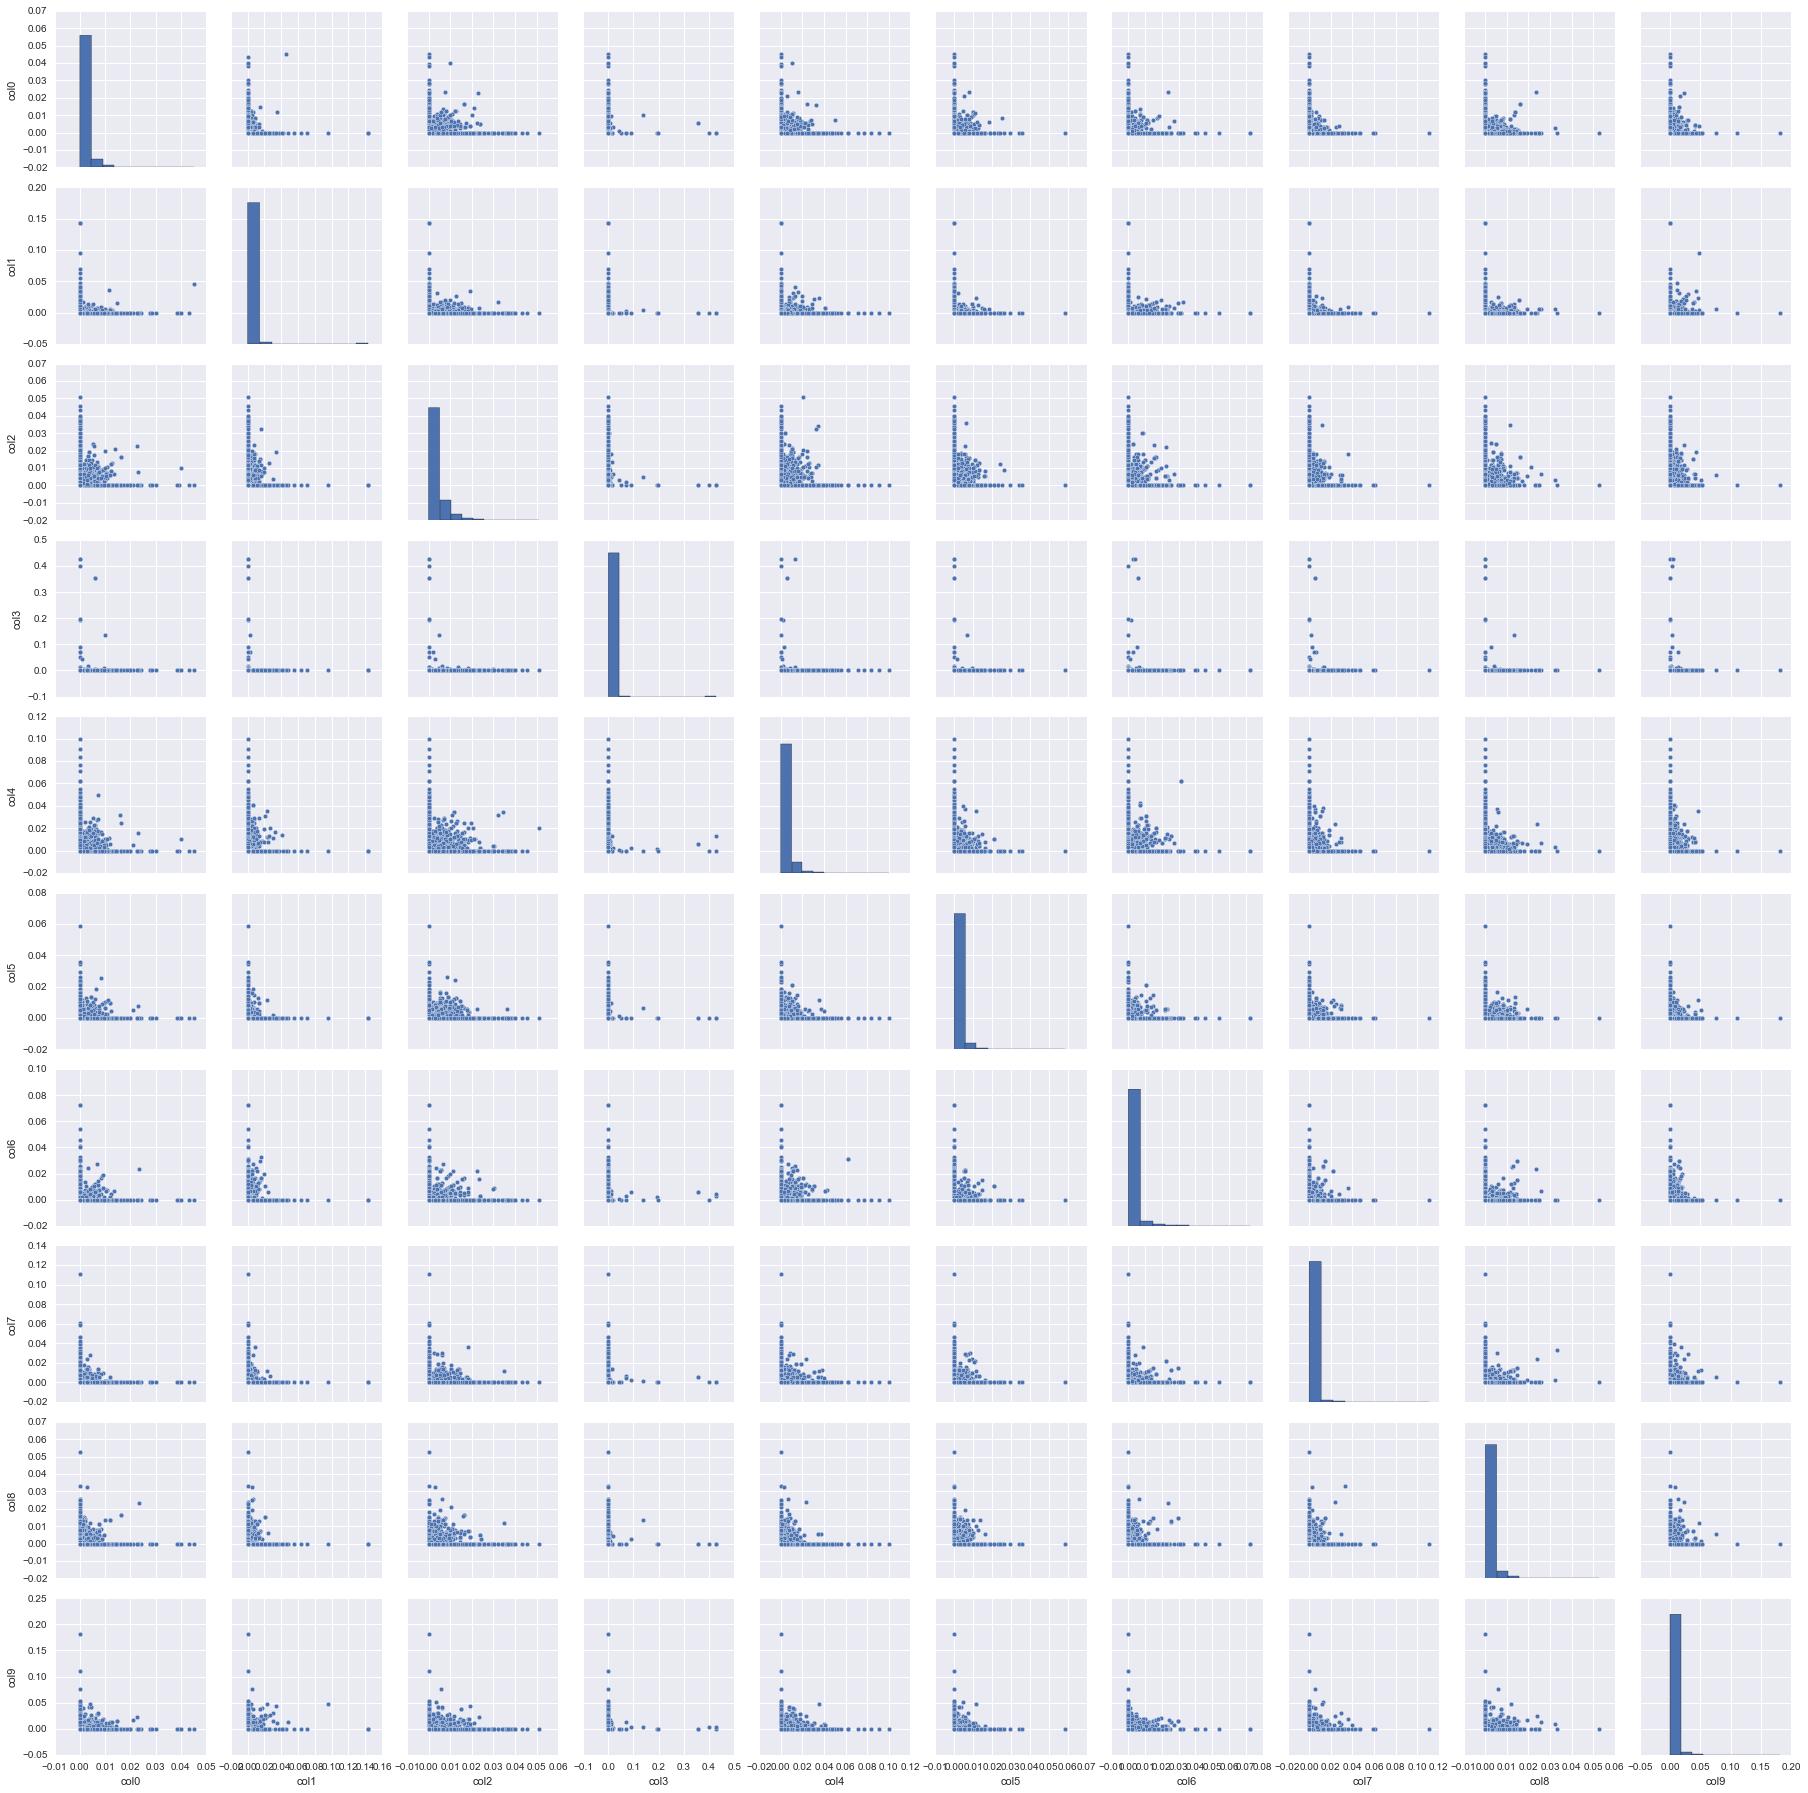

In [32]:
sns.pairplot(x.iloc[:,0:10])

In [34]:
# spam vs. ham

y.value_counts()

0    2788
1    1813
Name: col57, dtype: int64

In [35]:
mnb = MultinomialNB()

In [36]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
mnb.fit(x, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
# acurately predicted spam email 60% correctly

mnb.score(x, y)

0.60725929145837865

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
y_hat = mnb.predict(x)

In [41]:
# got all spam, but also some ham emails

print classification_report(y, y_hat)

             precision    recall  f1-score   support

          0       0.61      1.00      0.76      2788
          1       1.00      0.00      0.01      1813

avg / total       0.76      0.61      0.46      4601



In [42]:
confusion_matrix(y, y_hat)

array([[2788,    0],
       [1807,    6]])

very unaggressive spam filter. lets check out some hyper params

In [43]:
predicted_prob = mnb.predict_proba(x)

In [44]:
predicted_prob

array([[ 0.59517944,  0.40482056],
       [ 0.58725293,  0.41274707],
       [ 0.5812276 ,  0.4187724 ],
       ..., 
       [ 0.60677015,  0.39322985],
       [ 0.60390326,  0.39609674],
       [ 0.60567129,  0.39432871]])

In [45]:
predicted_prob[:,0].min()

0.41424298537540388

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier()

In [48]:
rfc.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
# overfit, tree went all the way down

rfc.score(x,y)

0.99391436644207776

In [51]:
from sklearn.cross_validation import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [53]:
# roughly equally distributed

print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(3450, 54)
(3450,)
(1151, 54)
(1151,)


In [54]:
mnb.fit(x_train, y_train)
mnb.score(x_train, y_train)

0.60840579710144926

In [56]:
mnb.score(x_test, y_test)

0.60295395308427457

In [57]:
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)

0.99478260869565216

In [58]:
rfc.score(x_test, y_test)

0.92267593397046044

Lets try one more test with Gaussian

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
gnb = GaussianNB()

In [61]:
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)

0.80898550724637686

In [62]:
# this looks good. better performance over the others.

gnb.score(x_test, y_test)

0.83492615117289315

In [63]:
# not overpredicting one category in detriment to the other category

confusion_matrix(y_test, rfc.predict(x_test))

array([[668,  24],
       [ 65, 394]])

In [64]:
confusion_matrix(y_test, gnb.predict(x_test))

array([[527, 165],
       [ 25, 434]])

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
log = LogisticRegression()

In [67]:
log.fit(x_train, y_train)
log.score(x_train, y_train)

0.61507246376811597

In [68]:
log.score(x_test, y_test)

0.60469157254561257

In [69]:
confusion_matrix(y_test, log.predict(x_test))

array([[680,  12],
       [443,  16]])